In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel('Schedules_Domestic (1).xlsx')

In [3]:
df.head

<bound method NDFrame.head of         ORIGIN DESTINATION                                          FREQUENCY  \
0    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
1    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
2    AHMEDABAD     AYODHYA                        TUESDAY, THURSDAY, SATURDAY   
3    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
4    AHMEDABAD    BAGDOGRA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
..         ...         ...                                                ...   
911   VARANASI       DELHI                                              DAILY   
912   VARANASI   HYDERABAD                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
913   VARANASI   HYDERABAD                        TUESDAY, THURSDAY, SATURDAY   
914   VARANASI      JAIPUR                                              DAILY   
915   VARANASI   KHAJURAHO                                 TUESDAY, WEDNESDAY  

In [4]:
df['EFFECTIVE FROM'][0]
# df['FREQUENCY'][0]

Timestamp('2024-03-17 00:00:00')

In [5]:
# df['EFFECTIVE FROM'] = pd.to_datetime(df['EFFECTIVE FROM'])


# Filter the DataFrame to keep only rows where 'timeframe_column' is greater than or equal to the threshold date
filtered_df = df[df['EFFECTIVE FROM'] <= pd.to_datetime('2024-04-15')]
filtered_df = filtered_df[filtered_df['EFFECTIVE TILL'] > pd.to_datetime('2024-04-22')]


In [6]:
def determine_value(row):
    if row['FREQUENCY'] == 'DAILY':
        return 7
    else:
        return len(row['FREQUENCY'].split())


# Apply the function to create the new column
filtered_df['flights_in_week'] = filtered_df.apply(determine_value, axis=1)

# filtered_df['ORIGIN', 'DESTINATIOIN'].head(40)

In [7]:
df['EFFECTIVE FROM'][0]  > pd.to_datetime('2024-04-15')

False

In [8]:
df['DEPARTURE'] = pd.to_datetime(df['DEPARTURE'], format='%I:%M %p').dt.strftime('%H')

In [10]:
filtered_df.head(30)

ORIGIN DESTINATION                                          FREQUENCY  \
2   AHMEDABAD     AYODHYA                        TUESDAY, THURSDAY, SATURDAY   
3   AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
4   AHMEDABAD    BAGDOGRA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
5   AHMEDABAD    BAGDOGRA                                          WEDNESDAY   
7   AHMEDABAD     CHENNAI                                              DAILY   
10  AHMEDABAD       DELHI                                              DAILY   
15  AHMEDABAD         GOA                                              DAILY   
16  AHMEDABAD   HYDERABAD                                              DAILY   
23  AHMEDABAD    VARANASI                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
29    AYODHYA   AHMEDABAD                        TUESDAY, THURSDAY, SATURDAY   
30    AYODHYA   AHMEDABAD  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
32    AYODHYA   BENGALURU                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
35    AYODHYA     CHENNAI                        TUESDAY, THURSDAY, SATURDAY   
36    AYODHYA     CHENNAI                                              DAILY   
41    AYODHYA       DELHI                                              DAILY   
42    AYODHYA   HYDERABAD                        TUESDAY, THURSDAY, SATURDAY   
45    AYODHYA     KOLKATA                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
49    AYODHYA      MUMBAI                                              DAILY   
52   BAGDOGRA   AHMEDABAD  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
53   BAGDOGRA   AHMEDABAD                                          WEDNESDAY   
54   BAGDOGRA   BENGALURU                                              DAILY   
61   BAGDOGRA       DELHI                                              DAILY   
62   BAGDOGRA       DELHI                                              DAILY   
63   BAGDOGRA       DELHI                                              DAILY   
69   BAGDOGRA    GUWAHATI                                              DAILY   
72   BAGDOGRA     KOLKATA                                              DAILY   
73   BAGDOGRA     KOLKATA                                              DAILY   
74   BAGDOGRA     KOLKATA                                              DAILY   
75   BAGDOGRA     KOLKATA                                              DAILY   
80   BAGDOGRA      MUMBAI                TUESDAY, THURSDAY, SATURDAY, SUNDAY   

   FLIGHT NO DEPARTURE   ARRIVAL                 VIA EFFECTIVE FROM  \
2    SG  611  05:45 AM  12:45 PM  CHENNAI, HYDERABAD     2024-03-31   
3    SG  511  11:10 AM  01:05 PM                   -     2024-03-31   
4    SG 8187  03:30 PM  06:10 PM                   -     2024-03-31   
5    SG 8187  03:40 PM  06:10 PM                   -     2024-03-31   
7    SG  611  05:45 AM  08:05 AM                   -     2024-03-31   
10   SG 8194  06:10 AM  07:50 AM                   -     2024-03-31   
15   SG  491  06:50 AM  08:25 AM                   -     2024-03-31   
16   SG  611  05:45 AM  09:55 AM             CHENNAI     2024-03-31   
23   SG  611  05:45 AM  12:50 PM  CHENNAI, HYDERABAD     2024-03-31   
29   SG  616  01:25 PM  09:15 PM  HYDERABAD, CHENNAI     2024-03-31   
30   SG  512  01:35 PM  03:15 PM                   -     2024-03-31   
32   SG  508  02:10 PM  04:35 PM                   -     2024-03-31   
35   SG  616  01:25 PM  06:15 PM           HYDERABAD     2024-03-31   
36   SG  323  05:30 PM  08:00 PM                   -     2024-03-31   
41   SG  472  04:50 PM  06:30 PM                   -     2024-03-31   
42   SG  616  01:25 PM  03:25 PM                   -     2024-03-31   
45   SG  508  02:10 PM  07:40 PM           BENGALURU     2024-03-31   
49   SG  324  12:05 PM  02:05 PM                   -     2024-03-31   
52   SG 8904  12:20 PM  02:55 PM                   -     2024-03-31   
53   SG 8904  12:20 PM  03:10 PM                   -     2024-03-31   
54   SG 8896  01:30 PM  04:30 PM   

In [11]:
unique_values_count = filtered_df['ORIGIN'].nunique()
unique_values = filtered_df['ORIGIN'].unique()

print("Number of unique values in the column:", unique_values_count)
print(unique_values)

Number of unique values in the column: 31
['AHMEDABAD' 'AYODHYA' 'BAGDOGRA' 'BENGALURU' 'BHAVNAGAR' 'CHENNAI'
 'DARBHANGA' 'DELHI' 'DHARAMSHALA' 'GOA' 'GUWAHATI' 'HYDERABAD' 'JABALPUR'
 'JAIPUR' 'JAMMU' 'KANDLA' 'KHAJURAHO' 'KOLKATA' 'LEH' 'MADURAI' 'MUMBAI'
 'PAKYONG' 'PATNA' 'PORT BLAIR' 'PUNE' 'SHILLONG' 'SHIRDI' 'SRINAGAR'
 'TEZPUR' 'TIRUPATI' 'VARANASI']


In [12]:
df = filtered_df

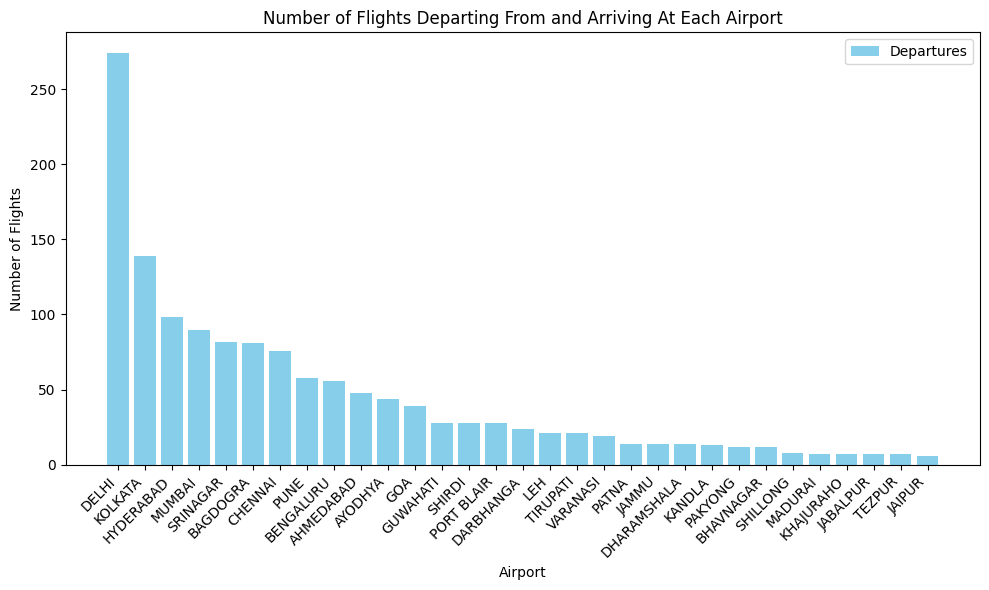

In [13]:
# Count the number of flights departing from each airport
departures = df.groupby('ORIGIN')['flights_in_week'].sum().reset_index()
departures.columns = ['Airport', 'Departures']

arrivals = df.groupby('DESTINATION')['flights_in_week'].sum().reset_index()
arrivals.columns = ['Airport', 'Arrivals']
# Merge the departure and arrival data
merged_data = pd.merge(departures, arrivals, on='Airport', how='outer').fillna(0)

merged_data = merged_data.sort_values(by = 'Departures',  ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Airport'], merged_data['Departures'], color='skyblue', label='Departures')
# plt.bar(merged_data['Airport'], merged_data['Arrivals'], color='orange', label='Arrivals')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Departing From and Arriving At Each Airport')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

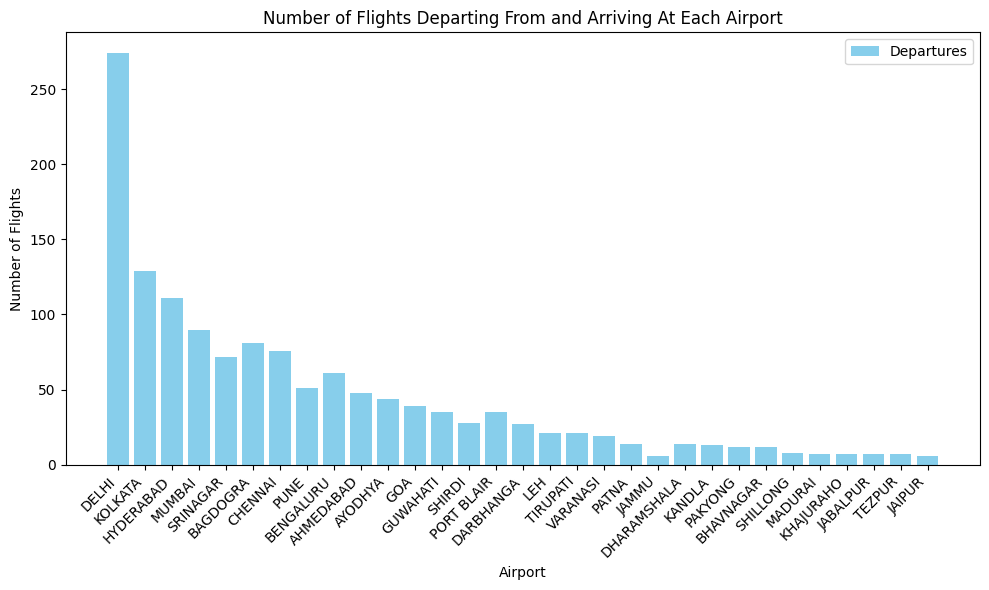

In [14]:
# Count the number of flights departing from each airport
departures = df.groupby('ORIGIN')['flights_in_week'].sum().reset_index()
departures.columns = ['Airport', 'Departures']

arrivals = df.groupby('DESTINATION')['flights_in_week'].sum().reset_index()
arrivals.columns = ['Airport', 'Arrivals']
# Merge the departure and arrival data
merged_data = pd.merge(departures, arrivals, on='Airport', how='outer').fillna(0)

merged_data = merged_data.sort_values(by = 'Departures',  ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Airport'], merged_data['Arrivals'], color='skyblue', label='Departures')
# plt.bar(merged_data['Airport'], merged_data['Arrivals'], color='orange', label='Arrivals')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Departing From and Arriving At Each Airport')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
merged_data

Airport  Departures  Arrivals
7         DELHI         274       274
17      KOLKATA         139       129
11    HYDERABAD          98       111
20       MUMBAI          90        90
27     SRINAGAR          82        72
2      BAGDOGRA          81        81
5       CHENNAI          76        76
24         PUNE          58        51
3     BENGALURU          56        61
0     AHMEDABAD          48        48
1       AYODHYA          44        44
9           GOA          39        39
10     GUWAHATI          28        35
26       SHIRDI          28        28
23   PORT BLAIR          28        35
6     DARBHANGA          24        27
18          LEH          21        21
29     TIRUPATI          21        21
30     VARANASI          19        19
22        PATNA          14        14
14        JAMMU          14         6
8   DHARAMSHALA          14        14
15       KANDLA          13        13
21      PAKYONG          12        12
4     BHAVNAGAR          12        12
25     SHILLONG           8         8
19      MADURAI           7         7
16    KHAJURAHO           7         7
12     JABALPUR           7         7
28       TEZPUR           7         7
13       JAIPUR           6         6

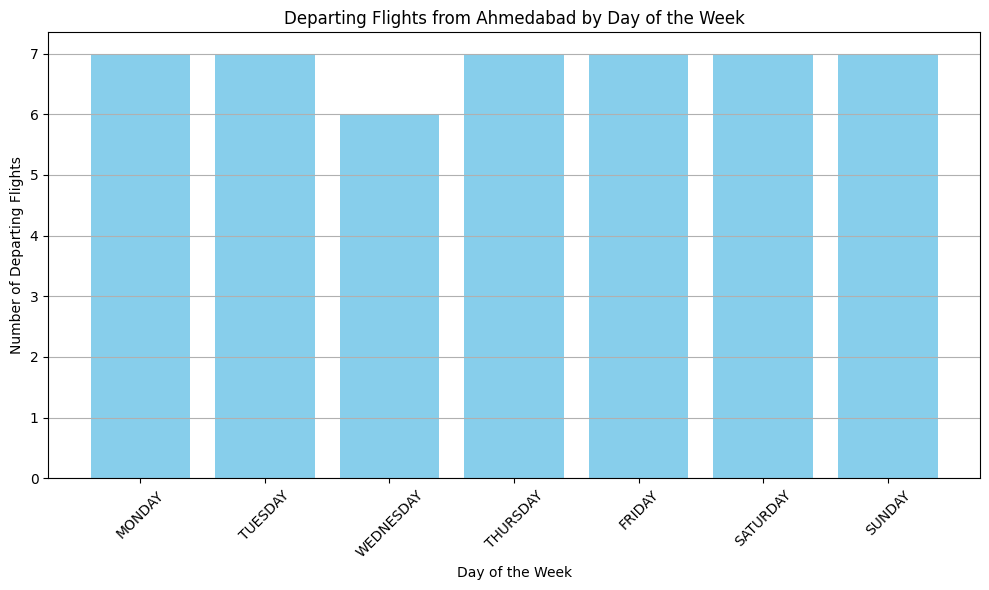

In [16]:
# Filter DataFrame for flights departing from Ahmedabad
ahmedabad_df = df[df['ORIGIN'] == 'AHMEDABAD']

# Convert 'FREQUENCY' column to a list of days
# ahmedabad_df['FREQUENCY'] = ahmedabad_df['FREQUENCY'].str.split(', ')

# Create a DataFrame with each day of the week as a separate row
days_of_week = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

# Function to count flights for each day of the week
def count_flights_on_day(day, frequency_list):
    # print(frequency_list, day)
    # count= 0
    # for flight in frequency_list:
    #     if 'DAILY' in flight:
    #         count = count + 1
    #     elif day in flight:
    #         count = count + 1
    # return count
    if 'DAILY' in frequency_list:
        return 1
    elif day in frequency_list:
        return 1
    else : 
        # print("0 was here")
        return 0

# Calculate the number of flights departing on each day of the week from Ahmedabad
departures_by_day = {}
for day in days_of_week:
    departures_by_day[day] = ahmedabad_df['FREQUENCY'].apply(lambda x: count_flights_on_day(day, x)).sum()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(departures_by_day.keys(), departures_by_day.values(), color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Departing Flights')
plt.title('Departing Flights from Ahmedabad by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [17]:
df.head(44)

ORIGIN DESTINATION                                          FREQUENCY  \
2    AHMEDABAD     AYODHYA                        TUESDAY, THURSDAY, SATURDAY   
3    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
4    AHMEDABAD    BAGDOGRA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
5    AHMEDABAD    BAGDOGRA                                          WEDNESDAY   
7    AHMEDABAD     CHENNAI                                              DAILY   
10   AHMEDABAD       DELHI                                              DAILY   
15   AHMEDABAD         GOA                                              DAILY   
16   AHMEDABAD   HYDERABAD                                              DAILY   
23   AHMEDABAD    VARANASI                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
29     AYODHYA   AHMEDABAD                        TUESDAY, THURSDAY, SATURDAY   
30     AYODHYA   AHMEDABAD  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
32     AYODHYA   BENGALURU                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
35     AYODHYA     CHENNAI                        TUESDAY, THURSDAY, SATURDAY   
36     AYODHYA     CHENNAI                                              DAILY   
41     AYODHYA       DELHI                                              DAILY   
42     AYODHYA   HYDERABAD                        TUESDAY, THURSDAY, SATURDAY   
45     AYODHYA     KOLKATA                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
49     AYODHYA      MUMBAI                                              DAILY   
52    BAGDOGRA   AHMEDABAD  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
53    BAGDOGRA   AHMEDABAD                                          WEDNESDAY   
54    BAGDOGRA   BENGALURU                                              DAILY   
61    BAGDOGRA       DELHI                                              DAILY   
62    BAGDOGRA       DELHI                                              DAILY   
63    BAGDOGRA       DELHI                                              DAILY   
69    BAGDOGRA    GUWAHATI                                              DAILY   
72    BAGDOGRA     KOLKATA                                              DAILY   
73    BAGDOGRA     KOLKATA                                              DAILY   
74    BAGDOGRA     KOLKATA                                              DAILY   
75    BAGDOGRA     KOLKATA                                              DAILY   
80    BAGDOGRA      MUMBAI                TUESDAY, THURSDAY, SATURDAY, SUNDAY   
81    BAGDOGRA      MUMBAI                                              DAILY   
88   BENGALURU     AYODHYA                                             SUNDAY   
89   BENGALURU     AYODHYA                          MONDAY, WEDNESDAY, FRIDAY   
90   BENGALURU    BAGDOGRA                                              DAILY   
92   BENGALURU   DARBHANGA                        TUESDAY, THURSDAY, SATURDAY   
98   BENGALURU       DELHI                                              DAILY   
100  BENGALURU       DELHI                                              DAILY   
105  BENGALURU   HYDERABAD                                              DAILY   
107  BENGALURU     KOLKATA                        TUESDAY, THURSDAY, SATURDAY   
108  BENGALURU     KOLKATA                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
118  BENGALURU       PATNA                                              DAILY   
123  BENGALURU      SHIRDI                                              DAILY   
127  BHAVNAGAR      MUMBAI  MONDAY, TUESDAY, WEDNESDAY, THURSDAY, FRIDAY, ...   
131  BHAVNAGAR        PUNE  MONDAY, TUESDAY, WEDNESDAY, THURSDAY, FRIDAY, ...   

    FLIGHT NO DEPARTURE   ARRIVAL                 VIA EFFECTIVE FROM  \
2     SG  611  05:45 AM  12:45 PM  CHENNAI, HYDERABAD     2024-03-31   
3     SG  511  11:10 AM  01:05 PM                   -     2024-03-31   
4     SG 8187  03:30 PM  06:10 PM                   -     2024-03-31   
5     SG 8187  03:40 PM  06:10 PM                   -     2024-03-31   
7 

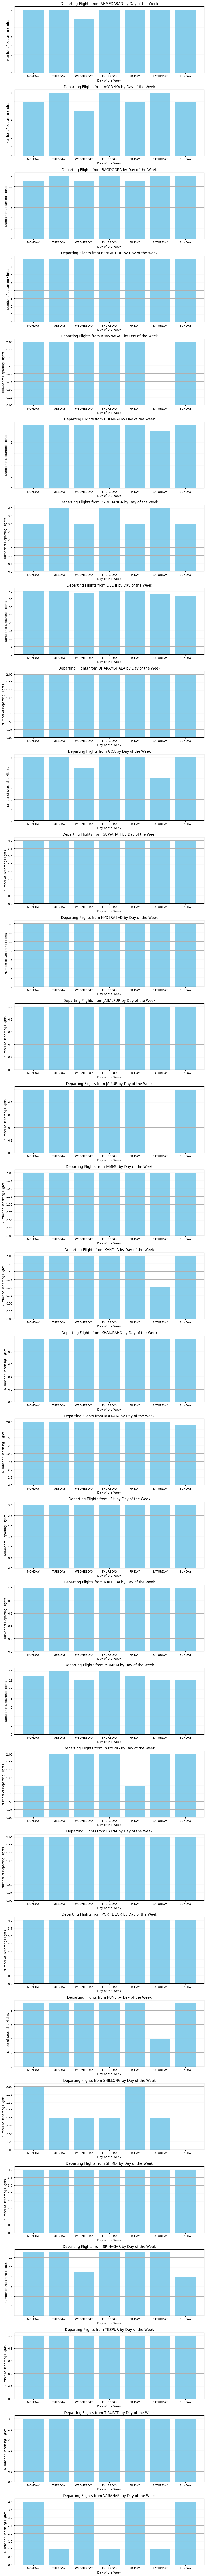

In [18]:

# Convert 'FREQUENCY' column to a list of days
# df['FREQUENCY'] = df['FREQUENCY'].str.split(', ')

# Create a DataFrame with each day of the week as a separate row

days_of_week = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

# cities = ["AHMEDABAD" , "MUMBAI", "GOA"]
cities = filtered_df['ORIGIN'].unique()
# Create subplots for each city
fig, axes = plt.subplots(nrows= len(cities) , ncols=1, figsize=(10, 4 * len(cities)))

# Iterate over each unique city



for idx, city in enumerate(cities):
    # Filter DataFrame for flights departing from the current city
    city_df = df[df['ORIGIN'] == city]
    
    # Create a DataFrame with each day of the week as a separate row
    # city_all_days_df = pd.DataFrame(days_of_week, columns=['Day'])
    
    # Function to count flights for each day of the week
    def count_flights_on_day(day, frequency_list):
        if 'DAILY' in frequency_list:
            return 1
        elif day in frequency_list:
            return 1
        else : 
            # print("0 was here")
            return 0
    departures_by_day = {}
    for day in days_of_week:
        departures_by_day[day] = city_df['FREQUENCY'].apply(lambda x: count_flights_on_day(day, x)).sum()
    
    axes[idx].bar(departures_by_day.keys(), departures_by_day.values(), color='skyblue')
    axes[idx].set_xlabel('Day of the Week')
    axes[idx].set_ylabel('Number of Departing Flights')
    axes[idx].set_title(f'Departing Flights from {city} by Day of the Week')
    # axes[idx].xticks(rotation=45)
    axes[idx].grid(axis='y')

plt.tight_layout()
plt.show()

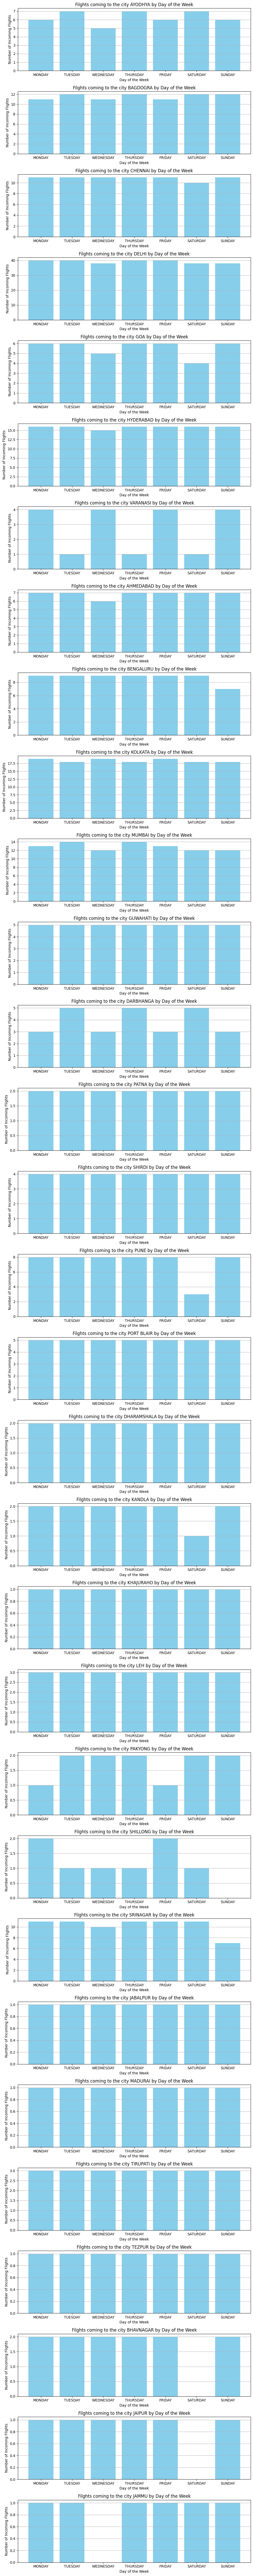

In [96]:
days_of_week = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

# cities = ["AHMEDABAD" , "MUMBAI", "GOA"]
cities = filtered_df['DESTINATION'].unique()
# Create subplots for each city
fig, axes = plt.subplots(nrows= len(cities) , ncols=1, figsize=(10, 3.25 * len(cities)))

# Iterate over each unique city



for idx, city in enumerate(cities):
    # Filter DataFrame for flights departing from the current city
    city_df = df[df['DESTINATION'] == city]
    
    # Create a DataFrame with each day of the week as a separate row
    # city_all_days_df = pd.DataFrame(days_of_week, columns=['Day'])
    
    # Function to count flights for each day of the week
    def count_flights_on_day(day, frequency_list):
        if 'DAILY' in frequency_list:
            return 1
        elif day in frequency_list:
            return 1
        else : 
            # print("0 was here")
            return 0
    departures_by_day = {}
    for day in days_of_week:
        departures_by_day[day] = city_df['FREQUENCY'].apply(lambda x: count_flights_on_day(day, x)).sum()
    
    axes[idx].bar(departures_by_day.keys(), departures_by_day.values(), color='skyblue')
    axes[idx].set_xlabel('Day of the Week')
    axes[idx].set_ylabel('Number of Incoming Flights')
    axes[idx].set_title(f'Filghts coming to the city {city} by Day of the Week')
    # axes[idx].xticks(rotation=45)
    axes[idx].grid(axis='y')

plt.tight_layout()
plt.show()

### PLOT for all the flights 

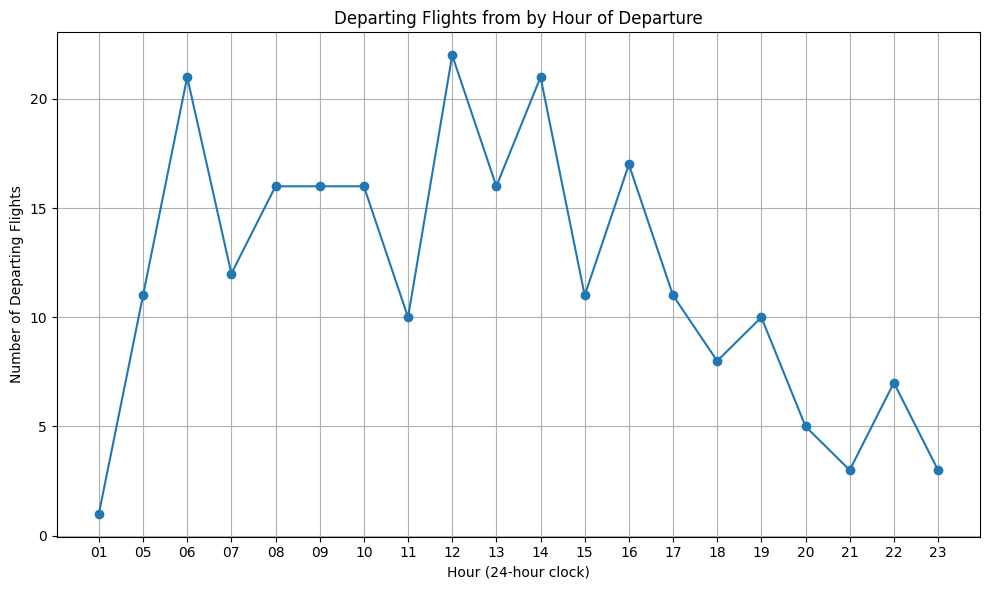

In [19]:
# Convert departure time to 24-hour clock format
df['DEPARTURE'] = pd.to_datetime(df['DEPARTURE'], format='%I:%M %p').dt.strftime('%H')

# Count the number of flights departing at each hour
flights_per_hour = df['DEPARTURE'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(flights_per_hour.index, flights_per_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour (24-hour clock)')
plt.ylabel('Number of Departing Flights')
plt.title('Departing Flights from by Hour of Departure')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
flights_per_hour.sum()

237

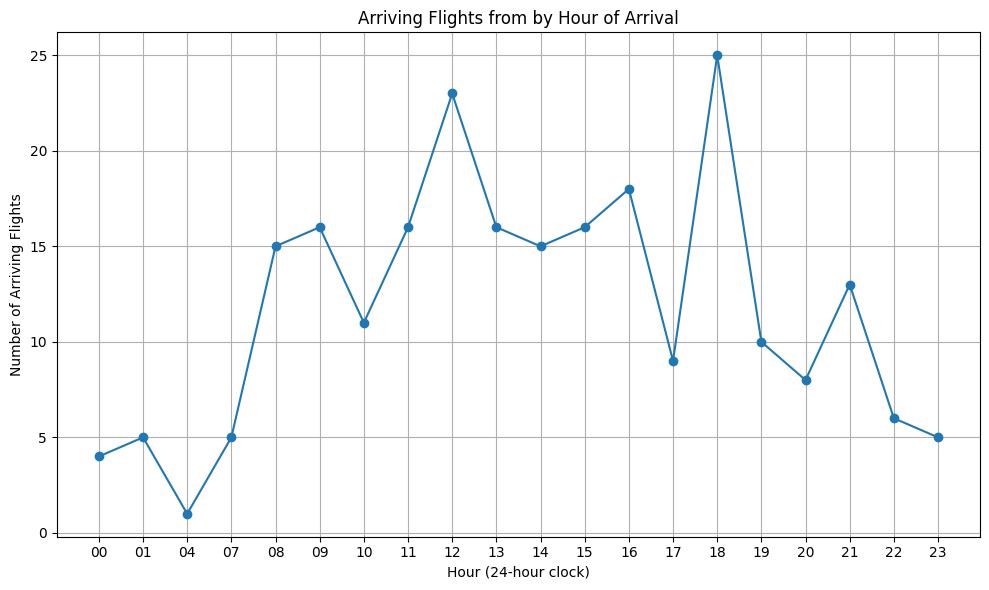

In [23]:
# Convert departure time to 24-hour clock format
df['ARRIVAL'] = pd.to_datetime(df['ARRIVAL'], format='%I:%M %p').dt.strftime('%H')

# Count the number of flights departing at each hour
flights_per_hour = df['ARRIVAL'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(flights_per_hour.index, flights_per_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour (24-hour clock)')
plt.ylabel('Number of Arriving Flights')
plt.title('Arriving Flights from by Hour of Arrival')
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
file_path = 'output.csv'

# Export the DataFrame to CSV
df.to_csv(file_path, index=False)  # Set index=False to avoid saving row indices as a separate column

In [101]:
df.head(238)

ORIGIN DESTINATION                                          FREQUENCY  \
2    AHMEDABAD     AYODHYA                        TUESDAY, THURSDAY, SATURDAY   
3    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
4    AHMEDABAD    BAGDOGRA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
5    AHMEDABAD    BAGDOGRA                                          WEDNESDAY   
7    AHMEDABAD     CHENNAI                                              DAILY   
..         ...         ...                                                ...   
894   TIRUPATI   HYDERABAD                                              DAILY   
897   VARANASI   AHMEDABAD                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
899   VARANASI     CHENNAI                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
908   VARANASI       DELHI                                              DAILY   
912   VARANASI   HYDERABAD                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   

    FLIGHT NO DEPARTURE ARRIVAL                 VIA EFFECTIVE FROM  \
2     SG  611        05      12  CHENNAI, HYDERABAD     2024-03-31   
3     SG  511        11      13                   -     2024-03-31   
4     SG 8187        15      18                   -     2024-03-31   
5     SG 8187        15      18                   -     2024-03-31   
7     SG  611        05      08                   -     2024-03-31   
..        ...       ...     ...                 ...            ...   
894   SG 2918        20      21                   -     2024-03-31   
897   SG  616        13      21  HYDERABAD, CHENNAI     2024-03-31   
899   SG  616        13      18           HYDERABAD     2024-03-31   
908   SG 2990        22      23                   -     2024-03-31   
912   SG  616        13      15                   -     2024-03-31   

    EFFECTIVE TILL  flights_in_week  
2       2024-10-26                3  
3       2024-10-26                6  
4       2024-10-26                6  
5       2024-10-26                1  
7       2024-10-26                7  
..             ...              ...  
894     2024-10-26                7  
897     2024-10-26                4  
899     2024-10-26                4  
908     2024-10-26                7  
912     2024-10-26                4  

[237 rows x 10 columns]

2     05
3     11
4     15
5     15
7     05
10    06
15    06
16    05
23    05
Name: DEPARTURE, dtype: object
29    13
30    13
32    14
35    13
36    17
41    16
42    13
45    14
49    12
Name: DEPARTURE, dtype: object
52    12
53    12
54    13
61    14
62    15
63    18
69    14
72    08
73    16
74    17
75    18
80    08
81    17
Name: DEPARTURE, dtype: object
88     10
89     10
90     10
92     08
98     23
100    06
105    14
107    17
108    17
118    18
123    14
Name: DEPARTURE, dtype: object
127    09
131    17
Name: DEPARTURE, dtype: object
135    19
139    08
140    09
142    14
143    20
146    08
150    18
157    06
158    13
161    11
164    14
166    08
Name: DEPARTURE, dtype: object
170    12
174    13
175    15
182    09
183    09
Name: DEPARTURE, dtype: object
186    21
197    14
203    08
204    10
205    12
211    06
212    19
219    05
220    09
223    11
224    13
232    07
233    11
240    09
241    12
242    16
253    10
258    16
259    16
282    06
283 

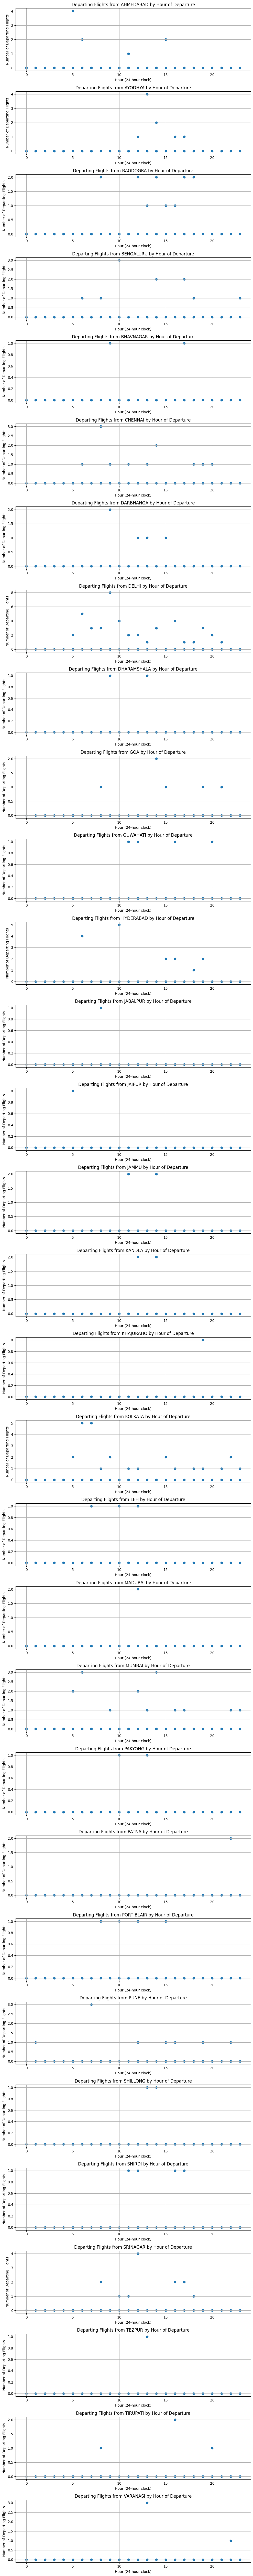

In [102]:

cities = filtered_df['ORIGIN'].unique()
# df['DEPARTURE'] = pd.to_datetime(df['DEPARTURE'], format='%I:%M %p').dt.strftime('%H')
# Create subplots for each city
# cities = ["MUMBAI", "GOA"]

fig, axes = plt.subplots(nrows= len(cities) , ncols=1, figsize=(10, 3.25 * len(cities)))

# Iterate over each unique cit
for idx, city in enumerate(cities):
    # Filter DataFrame for flights departing from the current city
    city_df = df[df['ORIGIN'] == city]
    print(city_df['DEPARTURE'])
    
    
    
    # Create a DataFrame with each day of the week as a separate row
    # city_all_days_df = pd.DataFrame(days_of_week, columns=['Day'])
    
    # Function to count flights for each day of the week
    # print(city)
    flights_per_hour = city_df['DEPARTURE'].value_counts().sort_index()
    flights_per_hour_all_hours = flights_per_hour.reindex(range(24)).fillna(0)

# # Combine the original values with the newly filled values
    flights_per_hour = flights_per_hour_all_hours.combine_first(flights_per_hour)
# Plot the graph

    # axes[idx].figure(figsize=(10, 6))
    axes[idx].scatter(flights_per_hour.index, flights_per_hour.values, marker='o', linestyle='-')
    axes[idx].set_xlabel('Hour (24-hour clock)')
    axes[idx].set_ylabel('Number of Departing Flights')
    axes[idx].set_title(f'Departing Flights from {city} by Hour of Departure')
    axes[idx].grid(True)
    
    # axes[idx].bar(departures_by_day.keys(), departures_by_day.values(), color='skyblue')
    # axes[idx].set_xlabel('Day of the Week')
    # axes[idx].set_ylabel('Number of Incoming Flights')
    # axes[idx].set_title(f'Filghts coming to the city {city} by Day of the Week')
    # # axes[idx].xticks(rotation=45)
    # axes[idx].grid(axis='y')

plt.tight_layout()
plt.show()

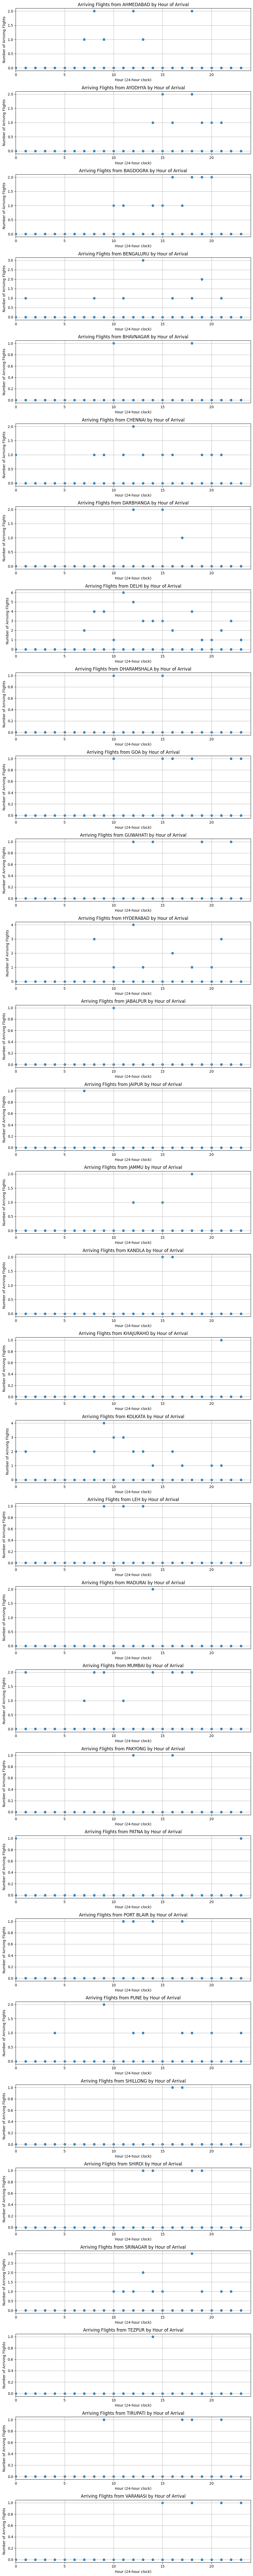

In [103]:

cities = filtered_df['ORIGIN'].unique()
# df['DEPARTURE'] = pd.to_datetime(df['DEPARTURE'], format='%I:%M %p').dt.strftime('%H')
# Create subplots for each city
# cities = ["MUMBAI", "GOA"]

fig, axes = plt.subplots(nrows= len(cities) , ncols=1, figsize=(10, 3.25 * len(cities)))

# Iterate over each unique cit
for idx, city in enumerate(cities):
    # Filter DataFrame for flights departing from the current city
    city_df = df[df['ORIGIN'] == city]
    # print(city_df['ARRIVAL'])
    
    # Create a DataFrame with each day of the week as a separate row
    # city_all_days_df = pd.DataFrame(days_of_week, columns=['Day'])
    
    # Function to count flights for each day of the week
    # print(city)
    flights_per_hour = city_df['ARRIVAL'].value_counts().sort_index()
# Plot the graph
    flights_per_hour_all_hours = flights_per_hour.reindex(range(24)).fillna(0)

# # Combine the original values with the newly filled values
    flights_per_hour = flights_per_hour_all_hours.combine_first(flights_per_hour)

    # axes[idx].figure(figsize=(10, 6))\
    
    # print(flights_per_hour)
    # axes[idx].plot(flights_per_hour_all_hours.index, flights_per_hour_all_hours.values)
    axes[idx].scatter(flights_per_hour.index, flights_per_hour.values)
    axes[idx].set_xlim(0,24)
    axes[idx].set_xlabel('Hour (24-hour clock)')
    
    axes[idx].set_ylabel('Number of Arriving Flights')
    axes[idx].set_title(f'Arriving Flights from {city} by Hour of Arrival')
    axes[idx].grid(True)
    
    # axes[idx].bar(departures_by_day.keys(), departures_by_day.values(), color='skyblue')
    # axes[idx].set_xlabel('Day of the Week')
    # axes[idx].set_ylabel('Number of Incoming Flights')
    # axes[idx].set_title(f'Filghts coming to the city {city} by Day of the Week')
    # # axes[idx].xticks(rotation=45)
    # axes[idx].grid(axis='y')
# plt.x
plt.tight_layout()
plt.show()

#### block 6

In [105]:
df['DESTINATION']

2        AYODHYA
3        AYODHYA
4       BAGDOGRA
5       BAGDOGRA
7        CHENNAI
         ...    
894    HYDERABAD
897    AHMEDABAD
899      CHENNAI
908        DELHI
912    HYDERABAD
Name: DESTINATION, Length: 237, dtype: object

In [25]:
df.head(10)

ORIGIN DESTINATION                                          FREQUENCY  \
2   AHMEDABAD     AYODHYA                        TUESDAY, THURSDAY, SATURDAY   
3   AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
4   AHMEDABAD    BAGDOGRA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
5   AHMEDABAD    BAGDOGRA                                          WEDNESDAY   
7   AHMEDABAD     CHENNAI                                              DAILY   
10  AHMEDABAD       DELHI                                              DAILY   
15  AHMEDABAD         GOA                                              DAILY   
16  AHMEDABAD   HYDERABAD                                              DAILY   
23  AHMEDABAD    VARANASI                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
29    AYODHYA   AHMEDABAD                        TUESDAY, THURSDAY, SATURDAY   

   FLIGHT NO DEPARTURE ARRIVAL                 VIA EFFECTIVE FROM  \
2    SG  611        05      12  CHENNAI, HYDERABAD     2024-03-31   
3    SG  511        11      13                   -     2024-03-31   
4    SG 8187        15      18                   -     2024-03-31   
5    SG 8187        15      18                   -     2024-03-31   
7    SG  611        05      08                   -     2024-03-31   
10   SG 8194        06      07                   -     2024-03-31   
15   SG  491        06      08                   -     2024-03-31   
16   SG  611        05      09             CHENNAI     2024-03-31   
23   SG  611        05      12  CHENNAI, HYDERABAD     2024-03-31   
29   SG  616        13      21  HYDERABAD, CHENNAI     2024-03-31   

   EFFECTIVE TILL  flights_in_week  
2      2024-10-26                3  
3      2024-10-26                6  
4      2024-10-26                6  
5      2024-10-26                1  
7      2024-10-26                7  
10     2024-10-26                7  
15     2024-10-26                7  
16     2024-10-26                7  
23     2024-10-26                4  
29     2024-10-26                3

In [36]:

# Replace 'your_file.xlsx' with the path to your Excel file
df_new = pd.read_excel('Schedules_Domestic (1).xlsx')

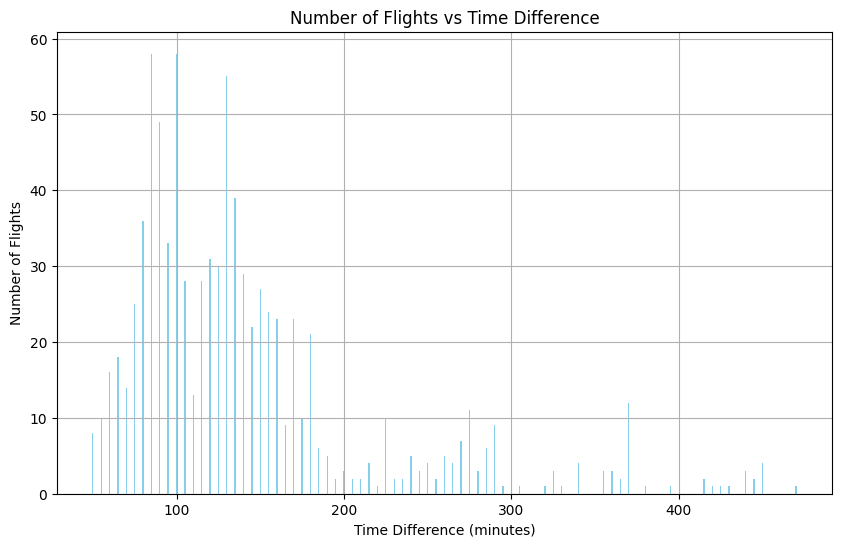

In [48]:

# Convert departure and arrival times to datetime objects
df_new['Departure'] = pd.to_datetime(df_new['DEPARTURE'], format='%I:%M %p')
df_new['Arrival'] = pd.to_datetime(df_new['ARRIVAL'], format='%I:%M %p')

# Calculate the time difference (in minutes)
df_new['TimeDifference'] = (df_new['Arrival'] - df_new['Departure']).dt.total_seconds() / 60

df_new = df_new[df_new['TimeDifference'] >= 0]

# # Plotting
flight_counts = df_new.groupby('TimeDifference').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(flight_counts.index, flight_counts.values, color='skyblue')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Number of Flights')
plt.title('Number of Flights vs Time Difference')
plt.grid(True)
plt.show()

In [44]:
df_new

ORIGIN DESTINATION                                          FREQUENCY  \
0    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
1    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
2    AHMEDABAD     AYODHYA                        TUESDAY, THURSDAY, SATURDAY   
3    AHMEDABAD     AYODHYA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
4    AHMEDABAD    BAGDOGRA  MONDAY, TUESDAY, THURSDAY, FRIDAY, SATURDAY, S...   
..         ...         ...                                                ...   
911   VARANASI       DELHI                                              DAILY   
912   VARANASI   HYDERABAD                  MONDAY, WEDNESDAY, FRIDAY, SUNDAY   
913   VARANASI   HYDERABAD                        TUESDAY, THURSDAY, SATURDAY   
914   VARANASI      JAIPUR                                              DAILY   
915   VARANASI   KHAJURAHO                                 TUESDAY, WEDNESDAY   

    FLIGHT NO DEPARTURE   ARRIVAL                 VIA EFFECTIVE FROM  \
0     SG  511  05:55 AM  08:00 AM                   -     2024-03-17   
1     SG  511  05:55 AM  08:00 AM                   -     2024-03-18   
2     SG  611  05:45 AM  12:45 PM  CHENNAI, HYDERABAD     2024-03-31   
3     SG  511  11:10 AM  01:05 PM                   -     2024-03-31   
4     SG 8187  03:30 PM  06:10 PM                   -     2024-03-31   
..        ...       ...       ...                 ...            ...   
911   SG  390  09:25 PM  11:10 PM                   -     2024-10-27   
912   SG  616  01:45 PM  03:45 PM                   -     2024-03-31   
913   SG  323  02:00 PM  03:55 PM                   -     2024-10-27   
914   SG 2974  09:30 AM  11:10 AM                   -     2024-10-27   
915   SG 2932  06:50 PM  07:50 PM                   -     2024-10-27   

    EFFECTIVE TILL           Departure             Arrival  TimeDifference  
0       2024-03-17 1900-01-01 05:55:00 1900-01-01 08:00:00           125.0  
1       2024-03-30 1900-01-01 05:55:00 1900-01-01 08:00:00           125.0  
2       2024-10-26 1900-01-01 05:45:00 1900-01-01 12:45:00           420.0  
3       2024-10-26 1900-01-01 11:10:00 1900-01-01 13:05:00           115.0  
4       2024-10-26 1900-01-01 15:30:00 1900-01-01 18:10:00           160.0  
..             ...                 ...                 ...             ...  
911     2025-02-28 1900-01-01 21:25:00 1900-01-01 23:10:00           105.0  
912     2024-10-26 1900-01-01 13:45:00 1900-01-01 15:45:00           120.0  
913     2025-02-28 1900-01-01 14:00:00 1900-01-01 15:55:00           115.0  
914     2025-02-28 1900-01-01 09:30:00 1900-01-01 11:10:00           100.0  
915     2025-02-28 1900-01-01 18:50:00 1900-01-01 19:50:00            60.0  

[916 rows x 12 columns]